In [4]:
# Python relies on libraries

# import a library for array manipulations
import numpy as np

#import a library for plotting
%matplotlib inline
import matplotlib.pyplot as plt

# import a library to loas files
import scipy.io as sio

In [6]:
# load the data
data = sio.loadmat('practice_eeg.mat')

# In python, everytime you load something, you must check the type
print 'The type of data is:', type(data)

The type of data is: <type 'dict'>


In [8]:
# extract the actual raw data from the 'data' dictionary
raw_data = data['raw']

# we now check the type for 'raw_data'
print 'The type of raw_data is:', type(raw_data)
print 'The dimensions of raw_data are:', raw_data.shape

The type of raw_data is: <type 'numpy.ndarray'>
The dimensions of raw_data are: (67, 581801)


In [11]:
# Let's get some general attributes of the data

# the number of eeg channels
nchan = 64

# eog channels
eog_chans = np.asarray([64, 65])

# stim channel
stim_chan = 66

# sampling rate
fs = 1000.0

# print how long the EEG recording is:
print 'The EEG is' , raw_data.shape[1]/fs , 'seconds long'

The EEG is 581.801 seconds long


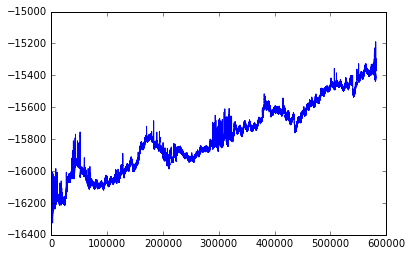

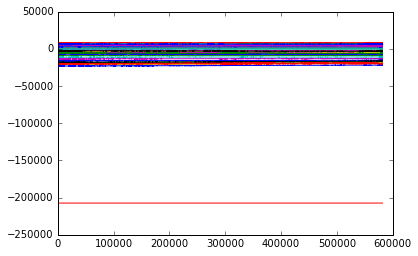

In [15]:
#let's see a single channel of eeg data
plt.plot(raw_data[0])
plt.show()

#can you tell me how to plot more than one channel?
plt.plot(raw_data.T)
plt.show()


Lets check the offset of channel 1: -16201.8


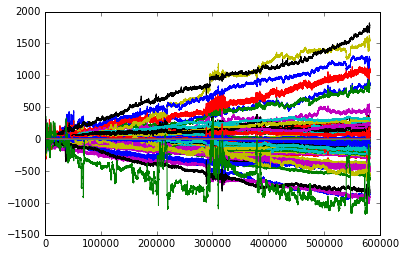

In [16]:
# we will remove the DC bias from all channels

print 'Lets check the offset of channel 1:', raw_data[0,0]

# let's create a matrix where we will store the data without an offset:
raw_data_no_offset = np.zeros(raw_data.shape)

for channel in range(67):
    raw_data_no_offset[channel, :] = raw_data[channel,:] - raw_data[channel,0]

plt.plot(raw_data_no_offset.T)
plt.show()

/Users/patriciarobinson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


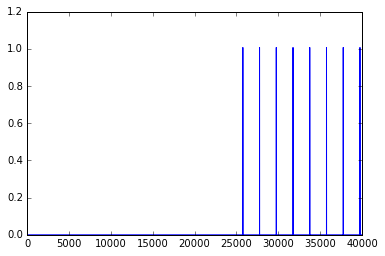

the shape of stim_idx is:  (1, 746)
The first 30 indices where stimli arrive are:  [35764 35765 35766 37756 37757 37758 39756 39757 39758 41756 41757 41758
 43756 43757 43758]


In [25]:
# let's epoch the data

# first, let's identify where the stimuli are
# as a first approximation, let's plot the stim channel

# let's just plot the first 10 seconds
plt.plot(raw_data_no_offset[stim_chan,fs*10:fs*50])
plt.show()

# we need to zoom in to the samples where the entry and exit of stimuli
# becomes more visually eident

# let's isolate the indices wher the triggers come in
stim_idx = np.asarray(np.where(raw_data_no_offset[stim_chan] > 1))

print 'the shape of stim_idx is: ', stim_idx.shape
print 'The first 30 indices where stimli arrive are: ', stim_idx[0,0:15]